# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jesica Emarapenta Br Sinulingga
- **Email:** jesikasinulingga204@gmail.com
- **ID Dicoding:** jesica_sinulingga

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berubah dari waktu ke waktu?
- Bagaimana persebaran peminjaman sepeda berbeda tergantung pada kondisi cuaca dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [42]:
bike_hour_df = pd.read_csv("https://raw.githubusercontent.com/jesikasinulingga/Submission-Proyek-Analisis-Data-dengan-Python/main/hour.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [41]:
bike_hour_df = pd.read_csv("https://raw.githubusercontent.com/jesikasinulingga/Submission-Proyek-Analisis-Data-dengan-Python/main/day_data.csv")
bike_hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [43]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
bike_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah Data yang terduplikasi: ", bike_hour_df.duplicated().sum())

Jumlah Data yang terduplikasi:  0


In [10]:
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
bike_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah data yang terduplikasi: ", bike_day_df.duplicated().sum())

bike_day_df.describe()

Jumlah data yang terduplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [14]:
bike_hour_df.drop_duplicates(inplace=True)

In [15]:
print("Jumlah data yang terduplikasi: ", bike_hour_df.duplicated().sum())

Jumlah data yang terduplikasi:  0


In [16]:
bike_hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [17]:
bike_hour_df['dteday'] = pd.to_datetime(bike_hour_df['dteday'])

In [18]:
bike_hour_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [19]:
bike_day_df.drop_duplicates(inplace=True)
print("Jumlah data yang terduplikasi: ", bike_day_df.duplicated().sum())
bike_day_df.dtypes

Jumlah data yang terduplikasi:  0


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [20]:
bike_day_df['dteday'] = pd.to_datetime(bike_day_df['dteday'])

In [33]:
bike_day_df.dropna(inplace=True)
bike_hour_df.dropna(inplace=True)
rfm_data.dropna(inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
print(bike_hour_df.head())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [22]:
print(bike_hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [23]:
print(bike_day_df.head())
print(bike_day_df.describe())

   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
          instant      season   

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pola penggunaan sepeda berubah dari waktu ke waktu?

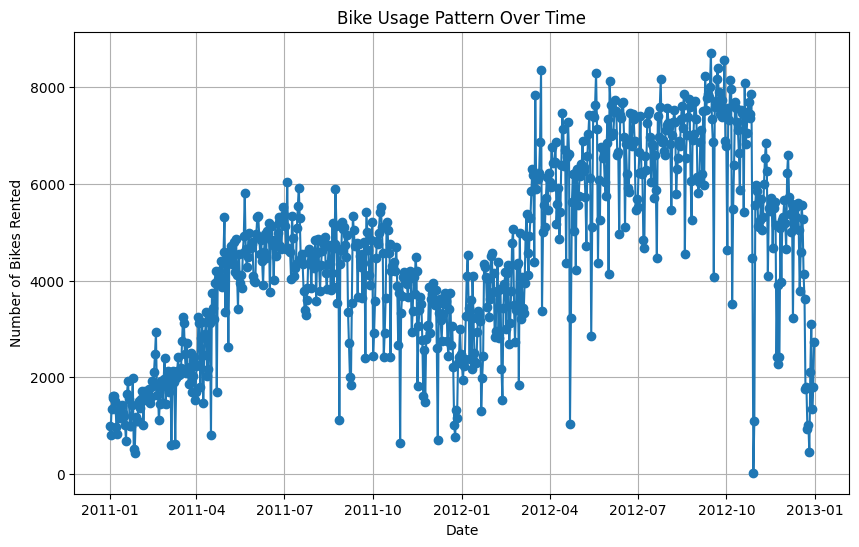

In [34]:
# Plotting the bike usage over time
plt.figure(figsize=(10, 6))
plt.plot(bike_day_df['dteday'], bike_day_df['cnt'], marker='o', linestyle='-')
plt.title('Bike Usage Pattern Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Bikes Rented')
plt.grid(True)
plt.show()


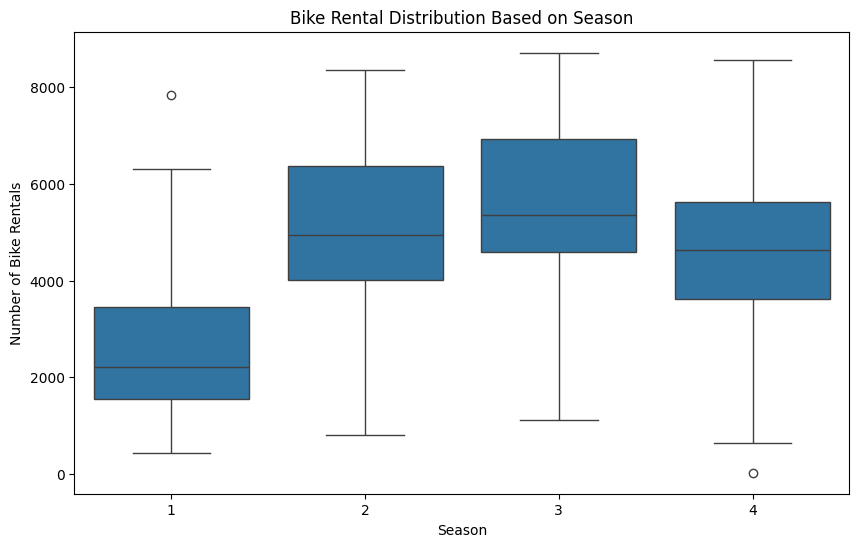

In [36]:
# Plotting bike rental distribution based on season
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=bike_day_df)
plt.title('Bike Rental Distribution Based on Season')
plt.xlabel('Season')
plt.ylabel('Number of Bike Rentals')
plt.show()


### Pertanyaan 2:Bagaimana persebaran peminjaman sepeda berbeda tergantung pada kondisi cuaca dan hari kerja?

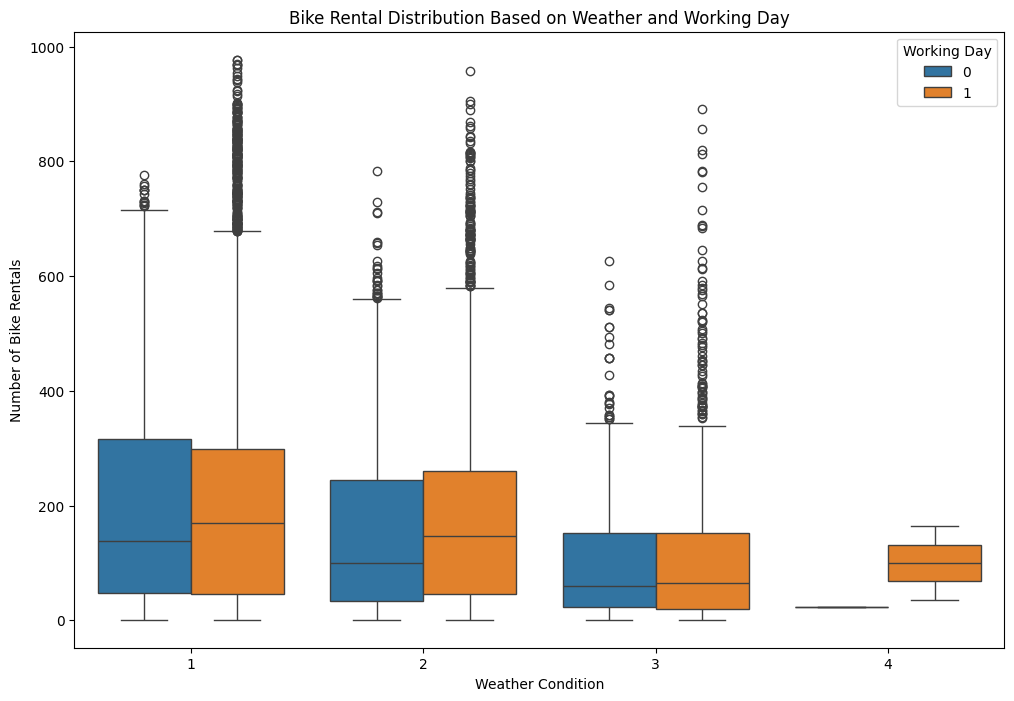

In [35]:
# Plotting bike distribution based on weather and working day
plt.figure(figsize=(12, 8))
sns.boxplot(x='weathersit', y='cnt', hue='workingday', data=bike_hour_df)
plt.title('Bike Rental Distribution Based on Weather and Working Day')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Bike Rentals')
plt.legend(title='Working Day', loc='upper right')
plt.show()


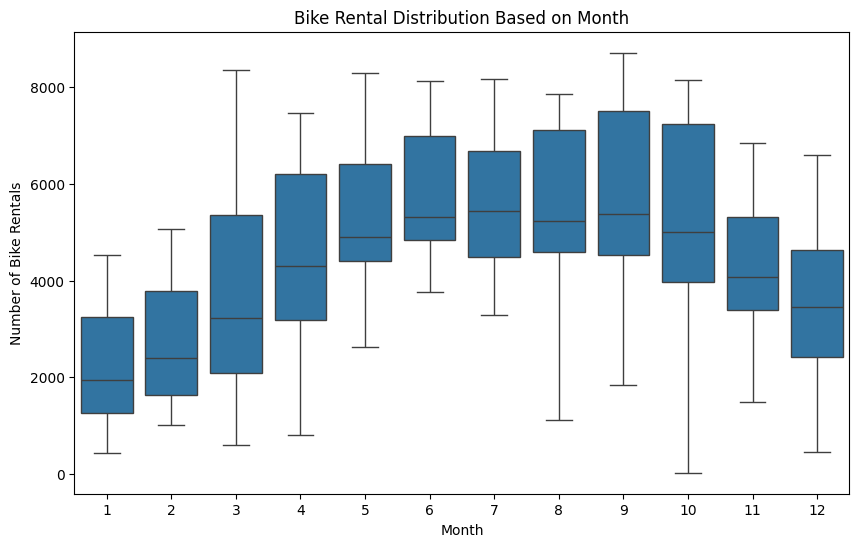

In [37]:
# Plotting bike rental distribution based on month
plt.figure(figsize=(10, 6))
sns.boxplot(x='mnth', y='cnt', data=bike_day_df)
plt.title('Bike Rental Distribution Based on Month')
plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.show()


## Conclusion

- Conclution pertanyaan 1 : Grafik menunjukkan tren peningkatan dalam penggunaan sepeda selama beberapa bulan awal, diikuti oleh penurunan yang signifikan menjelang akhir tahun. Pola ini mungkin berkaitan dengan musim, dengan peningkatan penggunaan pada musim panas dan penurunan pada musim dingin. Selain itu, faktor lain seperti perubahan cuaca atau hari kerja juga berperan dalam fluktuasi jumlah peminjaman sepeda seiring waktu.
- Conclution pertanyaan 2 :Distribusi peminjaman sepeda berdasarkan cuaca dan hari kerja menunjukkan bahwa pada hari kerja, jumlah peminjaman sepeda cenderung lebih tinggi pada cuaca yang lebih baik (weathersit = 1 atau 2). Namun, pada hari libur (workingday = 0), distribusi peminjaman tidak terlalu dipengaruhi oleh kondisi cuaca.

RFM Analisis

In [27]:
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [28]:
# Convert 'dteday' to datetime format
bike_hour_df['dteday'] = pd.to_datetime(bike_hour_df['dteday'])

# Determine RFM metrics
rfm_data = bike_hour_df.groupby('registered').agg({
    'dteday': lambda x: (bike_hour_df['dteday'].max() - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary (jumlah peminjaman)
})

# Rename columns for clarity
rfm_data.rename(columns={
    'dteday': 'Recency',
    'instant': 'Frequency',
    'cnt': 'Monetary'
}, inplace=True)

# Display the first few rows of the RFM data
print(rfm_data.head())


            Recency  Frequency  Monetary
registered                              
0                38         24        35
1                 0        201       294
2                 1        245       648
3                 0        294      1154
4                 3        307      1602


In [30]:
# Determine RFM metrics
rfm_data = bike_hour_df.groupby('registered').agg({
    'dteday': lambda x: (bike_hour_df['dteday'].max() - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'cnt': 'sum'  # Monetary (jumlah peminjaman)
})

# Rename columns for clarity
rfm_data.rename(columns={
    'dteday': 'Recency',
    'instant': 'Frequency',
    'cnt': 'Monetary'
}, inplace=True)

# Display the first few rows of the RFM data
print(rfm_data.head())

# Determine RFM categories
rfm_labels = ['1', '2', '3', '4']
rfm_data['Recency_Category'] = pd.qcut(rfm_data['Recency'], q=4, labels=rfm_labels)
rfm_data['Frequency_Category'] = pd.qcut(rfm_data['Frequency'], q=4, labels=rfm_labels)
rfm_data['Monetary_Category'] = pd.qcut(rfm_data['Monetary'], q=4, labels=rfm_labels)

# Display the first few rows of the RFM data with categories
print(rfm_data.head())


            Recency  Frequency  Monetary
registered                              
0                38         24        35
1                 0        201       294
2                 1        245       648
3                 0        294      1154
4                 3        307      1602
            Recency  Frequency  Monetary Recency_Category Frequency_Category  \
registered                                                                     
0                38         24        35                2                  3   
1                 0        201       294                1                  4   
2                 1        245       648                1                  4   
3                 0        294      1154                1                  4   
4                 3        307      1602                1                  4   

           Monetary_Category  
registered                    
0                          1  
1                          1  
2                          1

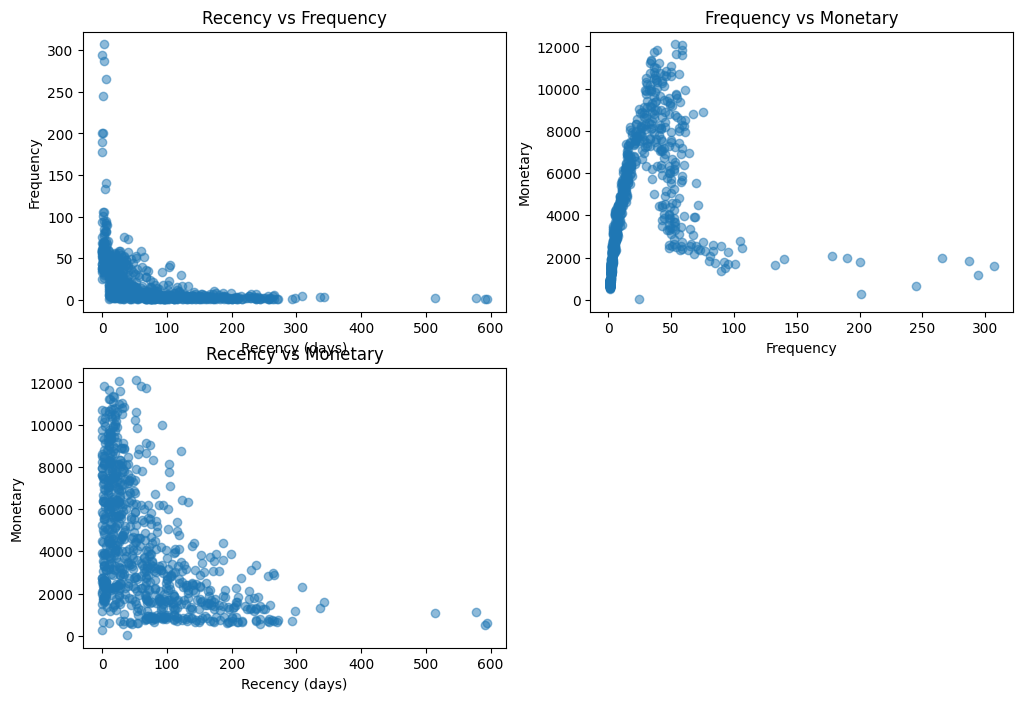

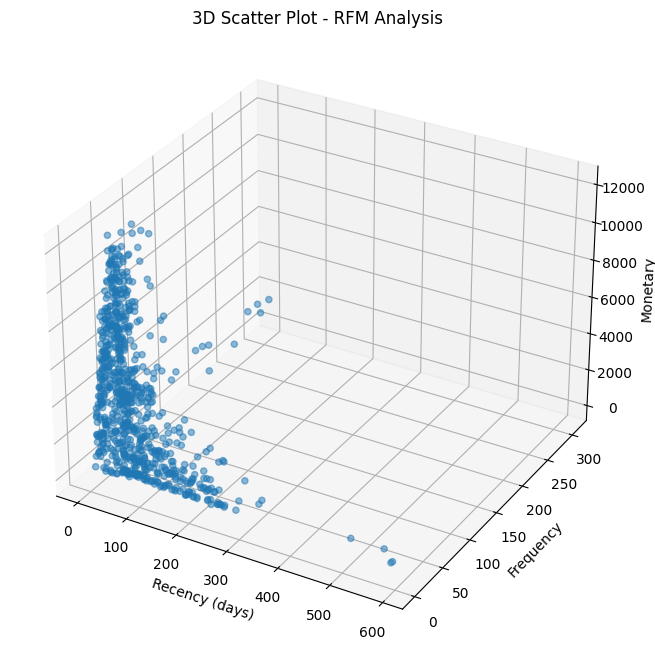

In [31]:
# Visualisasi RFM Analysis
plt.figure(figsize=(12, 8))

# Scatter plot Recency vs Frequency
plt.subplot(2, 2, 1)
plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], alpha=0.5)
plt.title('Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

# Scatter plot Frequency vs Monetary
plt.subplot(2, 2, 2)
plt.scatter(rfm_data['Frequency'], rfm_data['Monetary'], alpha=0.5)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Scatter plot Recency vs Monetary
plt.subplot(2, 2, 3)
plt.scatter(rfm_data['Recency'], rfm_data['Monetary'], alpha=0.5)
plt.title('Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary')

# Scatter plot 3D Recency, Frequency, Monetary
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], alpha=0.5)
ax.set_xlabel('Recency (days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot - RFM Analysis')

plt.show()

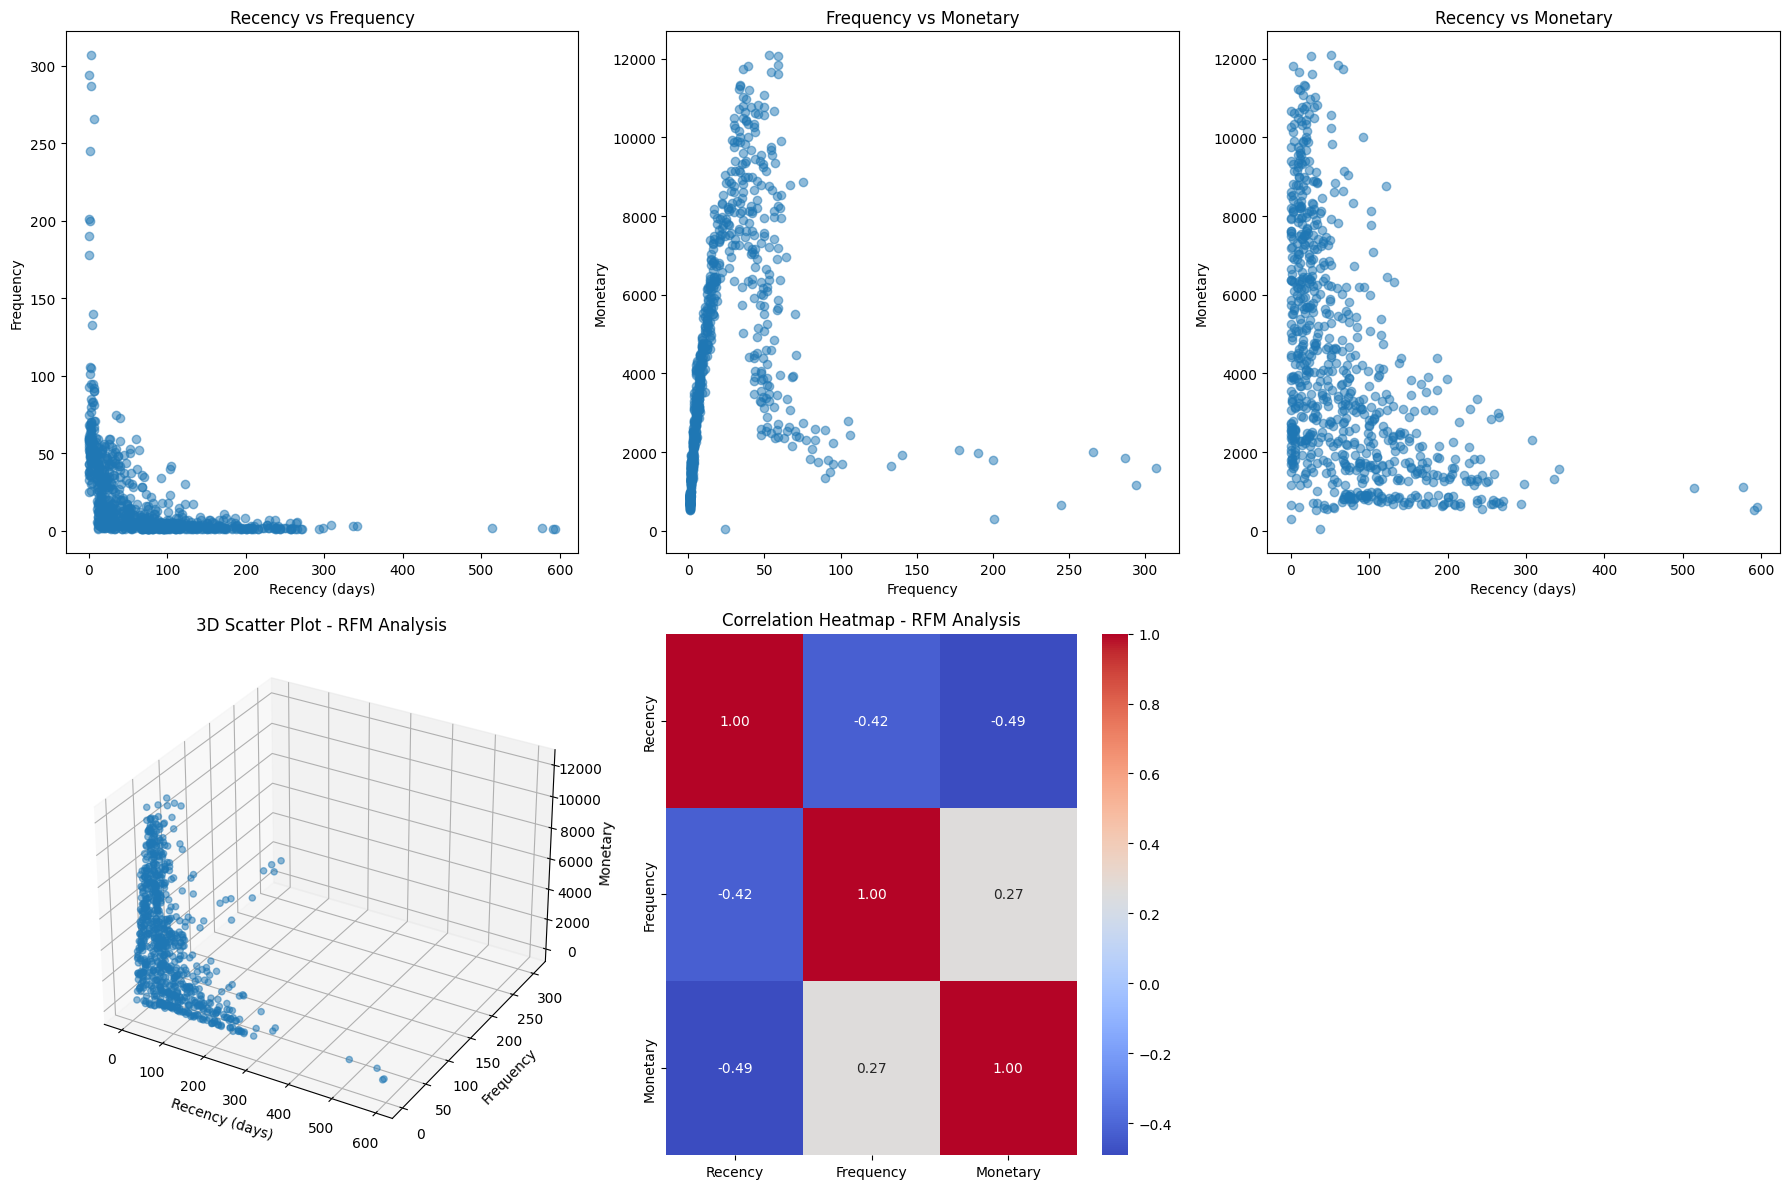

In [38]:
# Visualisasi RFM Analysis
plt.figure(figsize=(18, 12))

# Scatter plot Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(rfm_data['Recency'], rfm_data['Frequency'], alpha=0.5)
plt.title('Recency vs Frequency')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')

# Scatter plot Frequency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(rfm_data['Frequency'], rfm_data['Monetary'], alpha=0.5)
plt.title('Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

# Scatter plot Recency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(rfm_data['Recency'], rfm_data['Monetary'], alpha=0.5)
plt.title('Recency vs Monetary')
plt.xlabel('Recency (days)')
plt.ylabel('Monetary')

# Scatter plot 3D Recency, Frequency, Monetary
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(2, 3, 4, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['Monetary'], alpha=0.5)
ax.set_xlabel('Recency (days)')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Scatter Plot - RFM Analysis')

# Heatmap untuk korelasi antara Recency, Frequency, dan Monetary
ax = plt.subplot(2, 3, 5)
sns.heatmap(rfm_data[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - RFM Analysis')

plt.tight_layout()
plt.show()


In [32]:
bike_day_df.to_csv("day_data.csv", index=False)
bike_hour_df.to_csv("hour_data.csv", index=False)
rfm_data.to_csv('rfm_data.csv', index=False)